# In this project, you will learn practically how to choose the best features that affect The price of the used car using    Data analysis & data visualization  and then using these features in  multi linear regression model    .

We will go through 5 tasks to implement our project:

              Task 1: Importing libraries and Exploring the Dataset.
              Task 2: Checking missing values and enhance the data for analysis.
              Task 3: Creating visual methods to analyze the data.
              Task 4: make linear regression model


# Task 1: Importing libraries and exploring dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import copy

## After making some data cleaning with excel

In [2]:
#importing the dataset
df=pd.read_csv("used cars reg.csv")

In [3]:
#checking the head of the data
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Mileage unit,Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,km/kg,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,kmpl,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,kmpl,1968,140.80,5,17.74


In [4]:
#checking the info and if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5836 non-null   object 
 1   Location           5836 non-null   object 
 2   Year               5836 non-null   int64  
 3   Kilometers_Driven  5836 non-null   int64  
 4   Fuel_Type          5836 non-null   object 
 5   Transmission       5836 non-null   object 
 6   Owner_Type         5836 non-null   object 
 7   Mileage            5836 non-null   float64
 8   Mileage unit       5836 non-null   object 
 9   Engine(CC)         5836 non-null   int64  
 10  Power(bhp)         5836 non-null   float64
 11  Seats              5836 non-null   int64  
 12  Price              5836 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 592.8+ KB


Expected output:

    The data consists of 6019 instances with 9 attributes.
    2 float type, 3 integar type, 9 object type (String)

## Step 2: Checking missing values and enhance the data for analysis.

In [11]:
# A brief summary on the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5836.0,2013.484750,3.157929,1998.00,2012.00,2014.00,2016.00,2019.00
Kilometers_Driven,5836.0,57195.126799,37762.178616,171.00,33476.25,52506.50,72250.25,775000.00
Mileage,5836.0,18.371462,4.187734,6.40,15.30,18.40,21.10,33.54
Engine(CC),5836.0,1621.712817,598.547357,624.00,1198.00,1495.00,1984.00,5998.00
Power(bhp),5836.0,113.146864,53.805221,34.20,75.00,96.30,138.10,560.00
Seats,5836.0,5.279986,0.793342,2.00,5.00,5.00,5.00,8.00
Price,5836.0,9.542108,11.169828,0.44,3.51,5.73,10.00,160.00
Transmission_Automatic,5836.0,0.287868,0.452808,0.00,0.00,0.00,1.00,1.00
Transmission_Manual,5836.0,0.712132,0.452808,0.00,0.00,1.00,1.00,1.00
Fuel_Type_CNG,5836.0,0.009424,0.096628,0.00,0.00,0.00,0.00,1.00


There is a variation in the numbers so we will need to make randomization before applying ML model

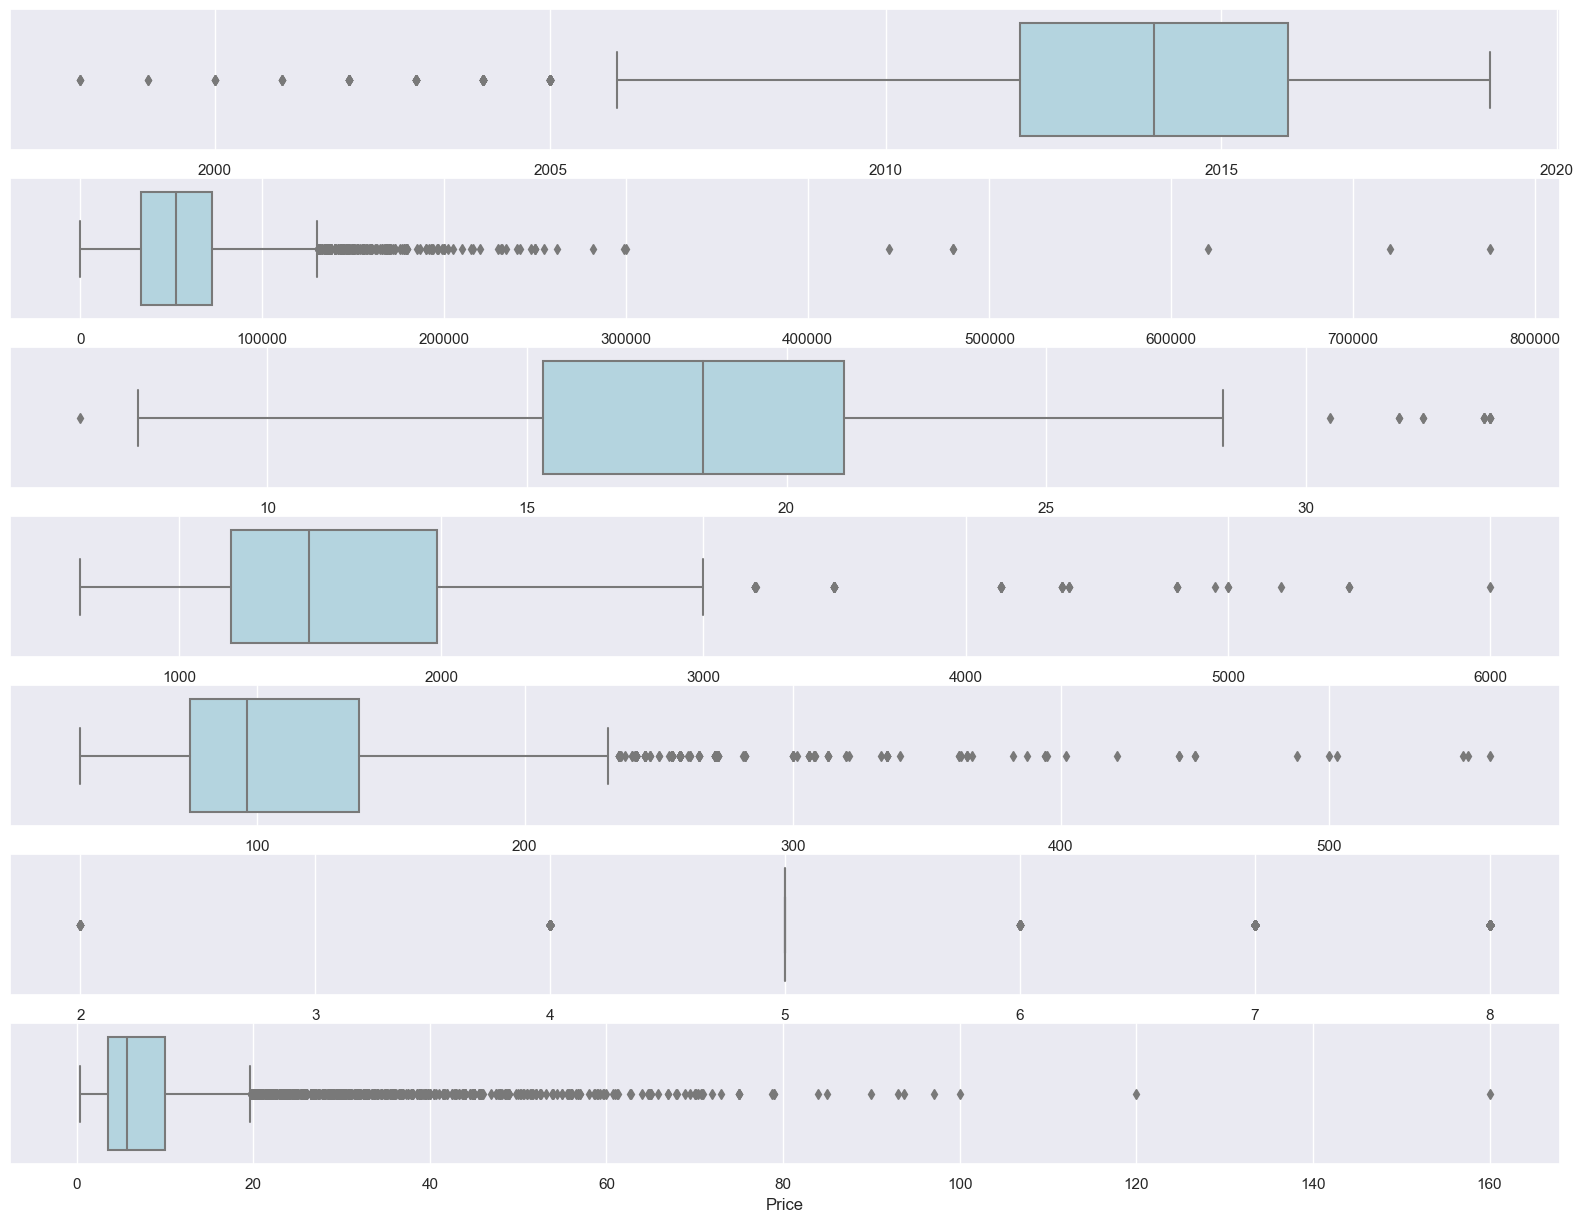

In [5]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(7,1,1)
sns.boxplot(x= df.Year, color='lightblue')

plt.subplot(7,1,2)
sns.boxplot(x= df.Kilometers_Driven, color='lightblue')

plt.subplot(7,1,3)
sns.boxplot(x= df.Mileage, color='lightblue')

plt.subplot(7,1,4)
sns.boxplot(x='Engine(CC)',data=df, color='lightblue')

plt.subplot(7,1,5)
sns.boxplot(x='Power(bhp)',data=df, color='lightblue')

plt.subplot(7,1,6)
sns.boxplot(x= df.Seats, color='lightblue')

plt.subplot(7,1,7)
sns.boxplot(x= df.Price, color='lightblue')

plt.show()

## Task 3: Creating visual methods to analyze the data.

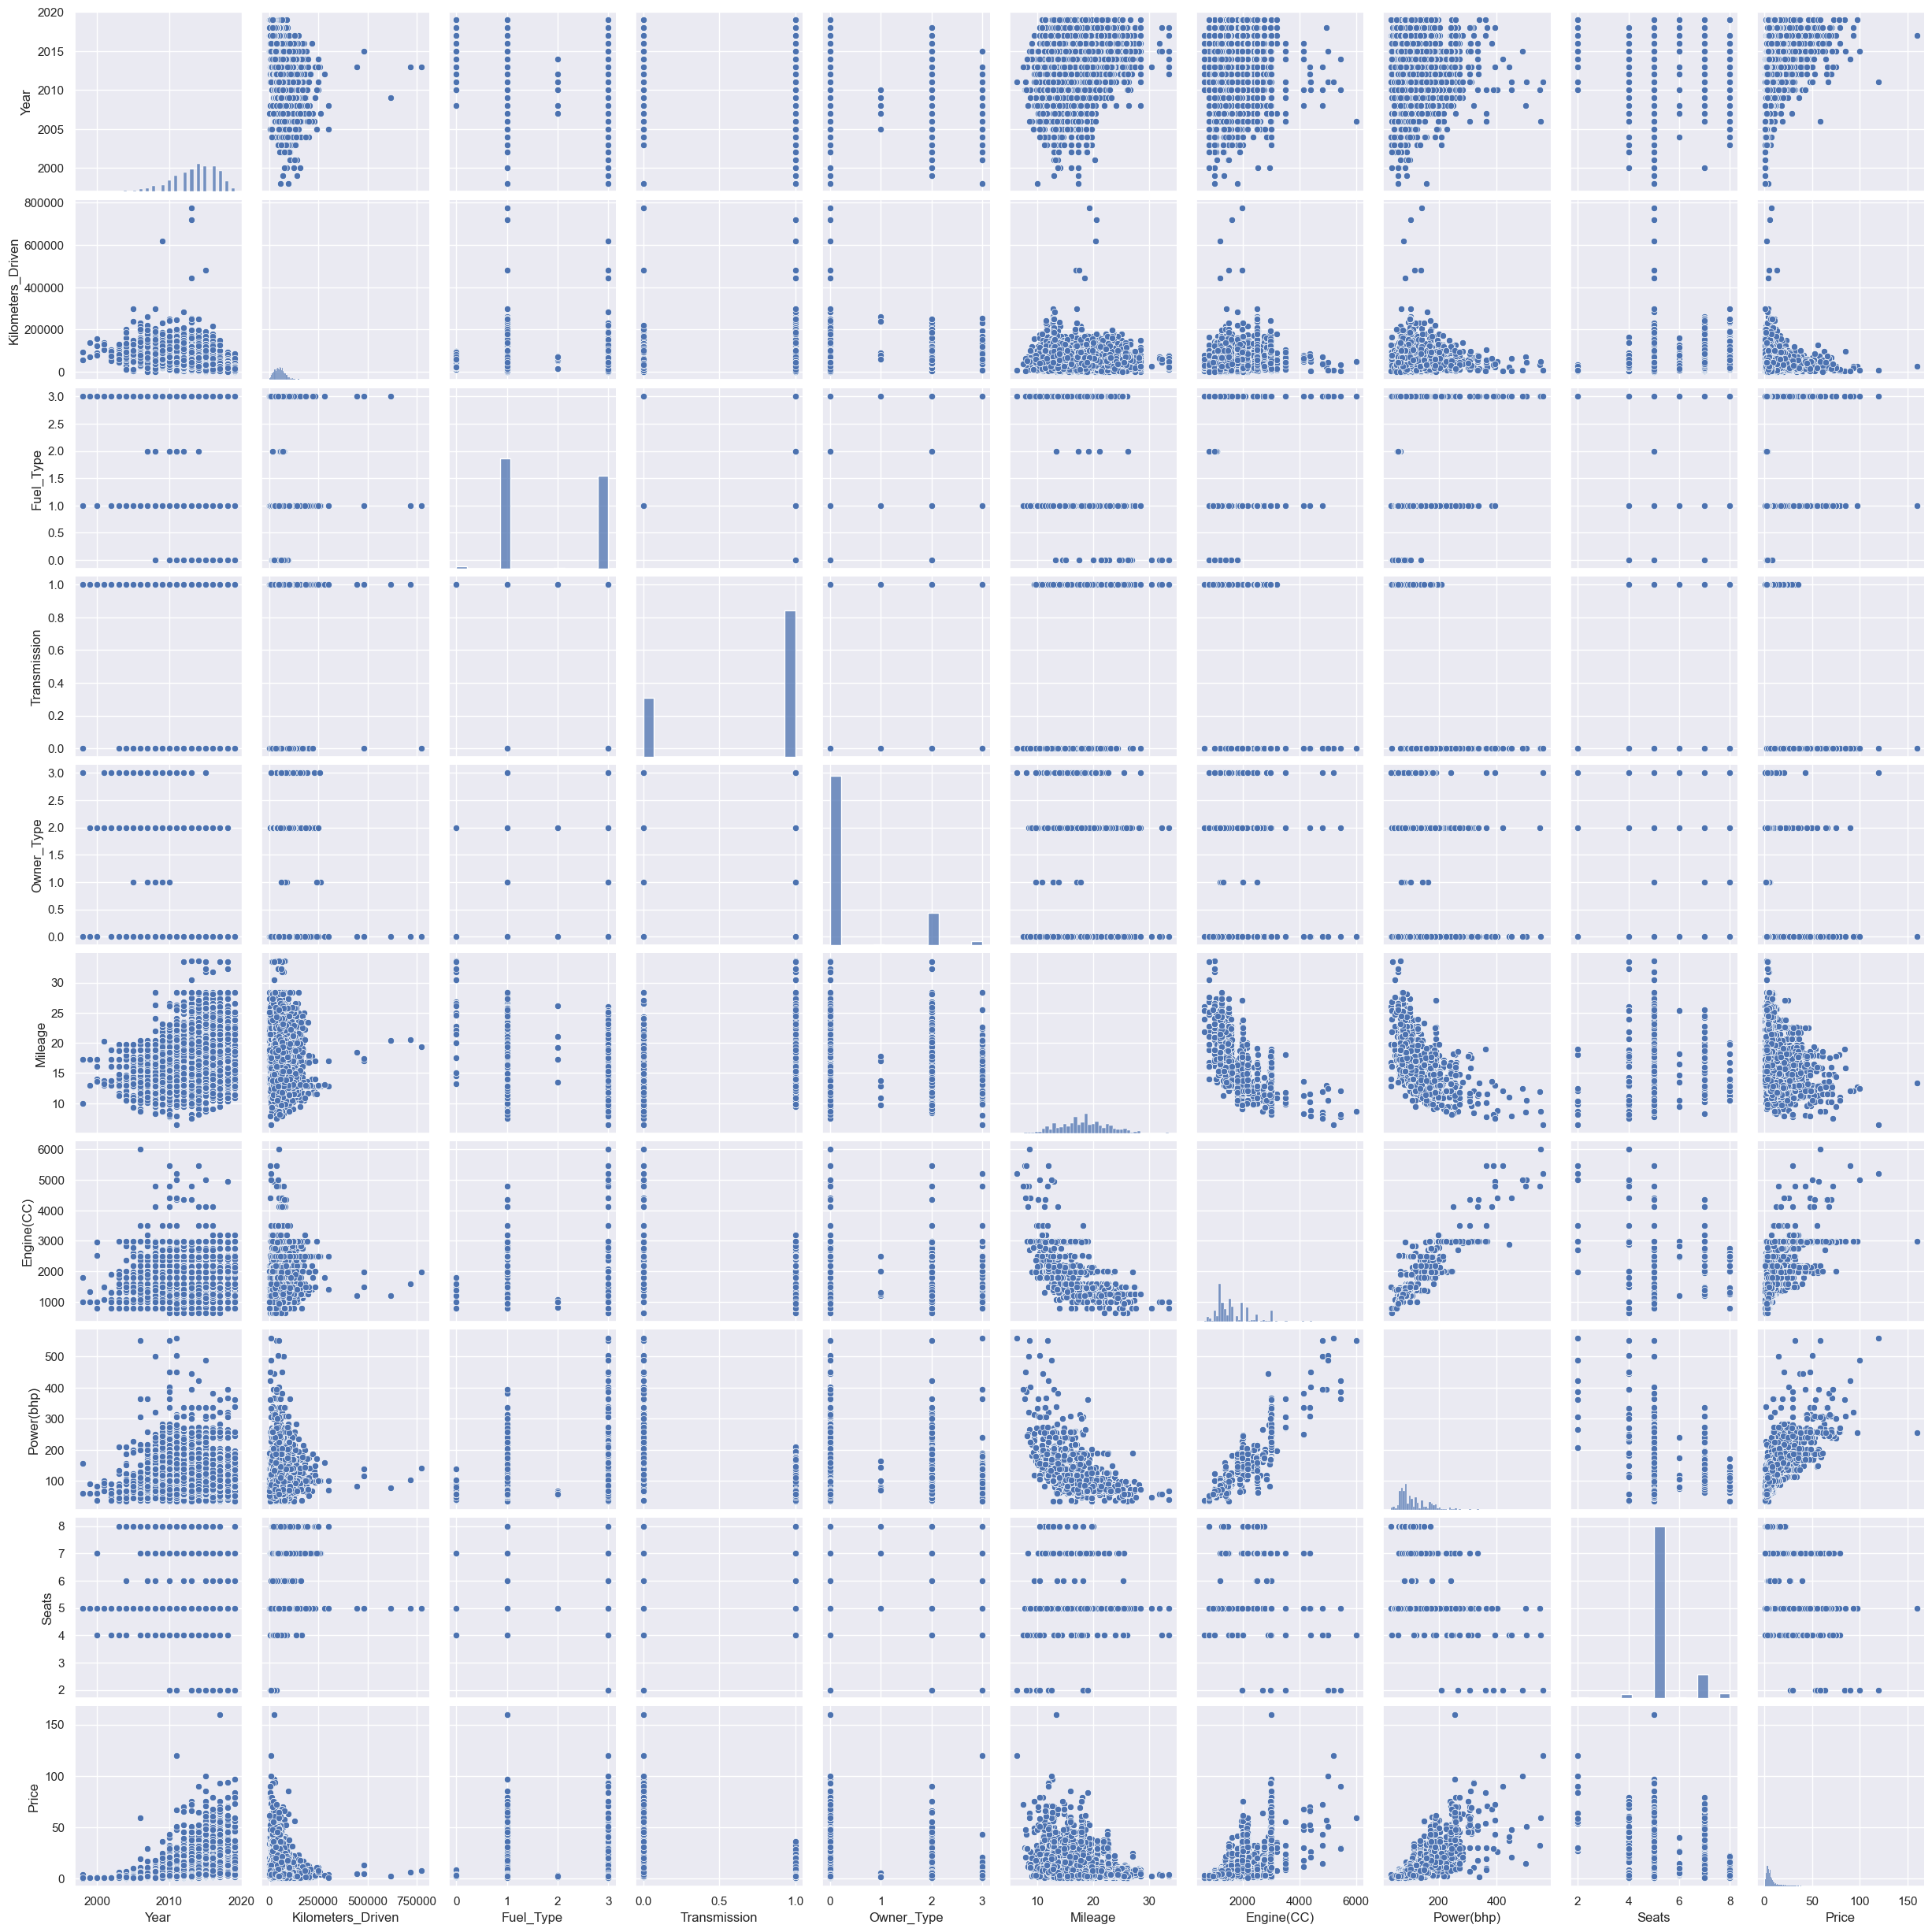

In [7]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['Fuel_Type', 'Transmission', 'Owner_Type']] = df_encoded.loc[:,['Fuel_Type', 'Transmission', 'Owner_Type']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded)  #pairplot
plt.show()

In [16]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine(CC),Power(bhp),Seats,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
Year,1.000000,-0.447001,0.293824,-0.068411,0.011401,0.015523,0.297343,0.083371,-0.083371,0.020971,0.109315,-0.035225,-0.110661
Kilometers_Driven,-0.447001,1.000000,-0.138870,0.161858,0.005822,0.213499,-0.162042,-0.104568,0.104568,-0.006611,0.233684,0.003040,-0.233086
Mileage,0.293824,-0.138870,1.000000,-0.648658,-0.555177,-0.353239,-0.338091,-0.366524,0.366524,0.167706,0.108138,0.010028,-0.141721
Engine(CC),-0.068411,0.161858,-0.648658,1.000000,0.868469,0.405581,0.658471,0.498943,-0.498943,-0.086469,0.428976,-0.041140,-0.409569
Power(bhp),0.011401,0.005822,-0.555177,0.868469,1.000000,0.108180,0.774751,0.643264,-0.643264,-0.087596,0.292394,-0.040992,-0.272528
Seats,0.015523,0.213499,-0.353239,0.405581,0.108180,1.000000,0.062254,-0.070309,0.070309,-0.029955,0.310437,-0.014623,-0.303982
Price,0.297343,-0.162042,-0.338091,0.658471,0.774751,0.062254,1.000000,0.582894,-0.582894,-0.052252,0.319094,-0.026170,-0.307369
Transmission_Automatic,0.083371,-0.104568,-0.366524,0.498943,0.643264,-0.070309,0.582894,1.000000,-1.000000,-0.062015,0.136683,-0.026341,-0.122711
Transmission_Manual,-0.083371,0.104568,0.366524,-0.498943,-0.643264,0.070309,-0.582894,-1.000000,1.000000,0.062015,-0.136683,0.026341,0.122711
Fuel_Type_CNG,0.020971,-0.006611,0.167706,-0.086469,-0.087596,-0.029955,-0.052252,-0.062015,0.062015,1.000000,-0.104759,-0.004041,-0.088803


<AxesSubplot:>

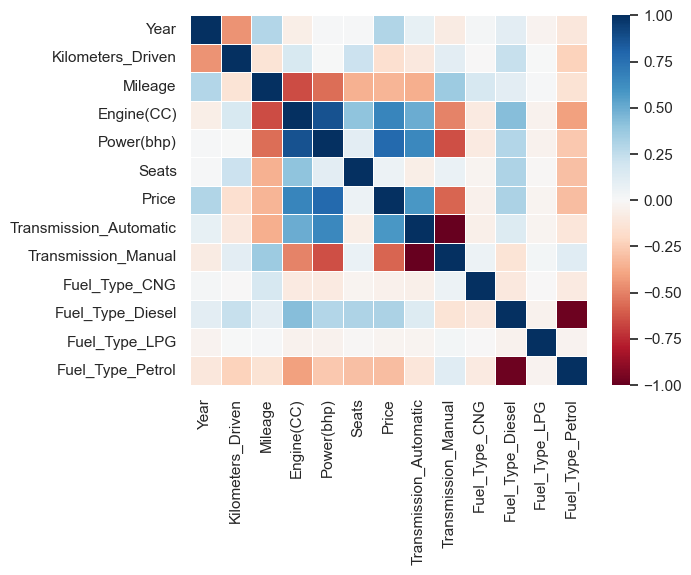

In [20]:
sns.heatmap(df.corr(),linewidths=0.5,cmap="RdBu")

In [6]:
# Encoding categorical data
columns_to_encode = ['Transmission', 'Fuel_Type']
dummy=pd.get_dummies(df[columns_to_encode])
dummy.head()
df=pd.concat([df,dummy],axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Mileage unit,Engine(CC),Power(bhp),Seats,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,km/kg,998,58.16,5,1.75,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582,126.20,5,12.50,0,1,0,1,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,kmpl,1199,88.70,5,4.50,0,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248,88.76,7,6.00,0,1,0,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,kmpl,1968,140.80,5,17.74,1,0,0,1,0,0


## Step 4: applying multi linear regression model

In [7]:
#grouping the features into feature vector "independent vector"
x=df[["Engine(CC)","Power(bhp)","Transmission_Automatic","Mileage","Year","Fuel_Type_CNG",'Fuel_Type_LPG','Fuel_Type_Diesel','Fuel_Type_Petrol']].values

In [8]:
#the dependent vector
y=df["Price"].values

In [9]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#fitting the data into linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
#predicting the outputs of x_test
y_pred=lr.predict(x_test)
#checking the r2score of the lr model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7139055568502424

# Accuracy is 71%